## Datathon 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import functools as ft

from scipy import stats
# from pandas_profiling import ProfileReport


In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 25)

In [3]:
df = pd.read_csv('.\data\data-1.csv')

In [4]:
df.head()

,subject_id,hospital_expire_flag,deathtime,gender,anchor_age,dod,valuenum,valueuom,itemid,charttime,storetime,icu_intime,icu_outtime,aspirin,p2y12,other_antiplatelet,starttime,stoptime
0,10881690,0,NaN,F,74,NaN,4.9,g/dL,51222,25/4/2163 14:26,25/4/2163 15:20,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
1,10881690,0,NaN,F,74,NaN,4.8,g/dL,51222,25/4/2163 16:15,25/4/2163 16:48,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
2,10881690,0,NaN,F,74,NaN,8.6,g/dL,51222,25/4/2163 19:36,25/4/2163 20:16,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
3,10881690,0,NaN,F,74,NaN,9.0,g/dL,51222,25/4/2163 23:29,25/4/2163 23:58,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00
4,10881690,0,NaN,F,74,NaN,8.2,g/dL,51222,26/4/2163 3:36,26/4/2163 4:18,25/4/2163 10:42,30/4/2163 22:43,0,0,1,25/4/2163 13:00,25/4/2163 13:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245361 entries, 0 to 245360
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            245361 non-null  int64  
 1   hospital_expire_flag  245361 non-null  int64  
 2   deathtime             35338 non-null   object 
 3   gender                245361 non-null  object 
 4   anchor_age            245361 non-null  int64  
 5   dod                   91201 non-null   object 
 6   valuenum              245361 non-null  float64
 7   valueuom              245361 non-null  object 
 8   itemid                245361 non-null  int64  
 9   charttime             245361 non-null  object 
 10  storetime             245361 non-null  object 
 11  icu_intime            245361 non-null  object 
 12  icu_outtime           245361 non-null  object 
 13  aspirin               245361 non-null  int64  
 14  p2y12                 245361 non-null  int64  
 15  

In [6]:
main_cohort_df = pd.read_csv('.\data\\final_main_cohort.csv')

In [7]:
main_cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            3523 non-null   float64
 1   hospital_expire_flag  3523 non-null   float64
 2   deathtime             744 non-null    object 
 3   gender                3523 non-null   object 
 4   age                   3523 non-null   float64
 5   dod                   1729 non-null   object 
 6   hosp_admittime        3523 non-null   object 
 7   icu_intime            3523 non-null   object 
 8   icu_outtime           3523 non-null   object 
 9   T0                    3526 non-null   object 
 10  delta_T               3523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 303.1+ KB


In [8]:
main_tmp_df = pd.read_csv('.\data\data-tmp_main_cohort.csv')

In [9]:
main_tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50934 entries, 0 to 50933
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            50934 non-null  int64 
 1   hospital_expire_flag  50934 non-null  int64 
 2   deathtime             5200 non-null   object
 3   gender                50934 non-null  object
 4   age                   50934 non-null  int64 
 5   dod                   16510 non-null  object
 6   hosp_admittime        50934 non-null  object
 7   icu_intime            50934 non-null  object
 8   icu_outtime           50934 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [10]:
trop_df = pd.read_csv('.\data\data-troponin_cohort.csv')

In [11]:
trop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286019 entries, 0 to 286018
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            286019 non-null  int64  
 1   hospital_expire_flag  286019 non-null  int64  
 2   deathtime             46448 non-null   object 
 3   gender                286019 non-null  object 
 4   age                   286019 non-null  int64  
 5   dod                   114290 non-null  object 
 6   hosp_admittime        286019 non-null  object 
 7   icu_intime            286019 non-null  object 
 8   icu_outtime           286019 non-null  object 
 9   valuenum              286019 non-null  float64
 10  valueuom              286019 non-null  object 
 11  itemid                286019 non-null  int64  
 12  lab_time              286019 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 28.4+ MB


In [12]:
trop_df['addmittime_dt'] = pd.to_datetime(trop_df['hosp_admittime'])

In [13]:
addmittime_df = trop_df.groupby('subject_id').first().reset_index()[['subject_id','addmittime_dt']]
addmittime_df.head()

,subject_id,addmittime_dt
0,10000980,2189-06-27 07:38:00
1,10001217,2157-11-18 22:56:00
2,10001725,2110-04-11 15:08:00
3,10001884,2131-01-07 20:39:00
4,10002013,2160-05-18 07:45:00


In [14]:
df = df.merge(addmittime_df,on='subject_id')

<span style='color:red'>earliest starttime/stoptime where medication of interest (aspirin/blah blah) is '1' 
<br> itemid identifying for lab measurement for hemoglo... storetime</span>

(1) earliest time when itemid (aspirin/p2y12/other_antiplatelet)==1
<br> (2) earliest time when itemid (hemo)==1 

In [15]:
df.isnull().sum()

subject_id                   0
hospital_expire_flag         0
deathtime               210000
gender                       0
anchor_age                   0
dod                     154143
valuenum                     0
valueuom                     0
itemid                       0
charttime                    0
storetime                    0
icu_intime                   0
icu_outtime                  0
aspirin                      0
p2y12                        0
other_antiplatelet           0
starttime                    0
stoptime                    42
addmittime_dt                0
dtype: int64

In [16]:
df['subject_id'].nunique()

16407

In [17]:
pd.to_datetime(df['deathtime'])

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
245333   NaT
245334   NaT
245335   NaT
245336   NaT
245337   NaT
Name: deathtime, Length: 245338, dtype: datetime64[ns]

In [18]:
# makes no sense
df[df['dod'].notna()][['dod']]

,dod
149,23/9/2154
150,23/9/2154
151,23/9/2154
152,23/9/2154
153,23/9/2154
...,...
245156,20/2/2124
245157,20/2/2124
245158,20/2/2124
245159,20/2/2124


In [19]:
# convert to datetime
df['deathtime_dt'] = pd.to_datetime(df['deathtime'])
df['charttime_dt'] = pd.to_datetime(df['charttime'])
df['storetime_dt'] = pd.to_datetime(df['storetime'])
df['icu_intime_dt'] = pd.to_datetime(df['icu_intime'])
df['icu_outtime_dt'] = pd.to_datetime(df['icu_outtime'])
df['starttime_dt'] = pd.to_datetime(df['starttime'])
df['stoptime_dt'] = pd.to_datetime(df['stoptime'])

In [20]:
# double check datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245338 entries, 0 to 245337
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   subject_id            245338 non-null  int64         
 1   hospital_expire_flag  245338 non-null  int64         
 2   deathtime             35338 non-null   object        
 3   gender                245338 non-null  object        
 4   anchor_age            245338 non-null  int64         
 5   dod                   91195 non-null   object        
 6   valuenum              245338 non-null  float64       
 7   valueuom              245338 non-null  object        
 8   itemid                245338 non-null  int64         
 9   charttime             245338 non-null  object        
 10  storetime             245338 non-null  object        
 11  icu_intime            245338 non-null  object        
 12  icu_outtime           245338 non-null  object        
 13 

In [21]:
# unique value
df['gender'].value_counts(normalize=True)

M    0.626866
F    0.373134
Name: gender, dtype: float64

In [22]:
# convert dod to mortality if value exists
df['mortality_dod'] = df['dod'].apply(lambda x: 0 if  x is np.nan else 1)

In [23]:
# convert deathtime to mortality if value exists
df['mortality_deathtime'] = df['deathtime'].apply(lambda x: 0 if  x is np.nan else 1)

In [24]:
# double check
df[df['mortality_dod']==1][['mortality_dod','dod']]

,mortality_dod,dod
149,1,23/9/2154
150,1,23/9/2154
151,1,23/9/2154
152,1,23/9/2154
153,1,23/9/2154
...,...,...
245156,1,20/2/2124
245157,1,20/2/2124
245158,1,20/2/2124
245159,1,20/2/2124


In [25]:
# double check
df[df['mortality_dod']==0][['mortality_dod','dod']]

,mortality_dod,dod
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
245333,0,NaN
245334,0,NaN
245335,0,NaN
245336,0,NaN


In [26]:
# check predicted
# df[df['mortality_deathtime']==1][['mortality_deathtime','deathtime_dt']]

In [27]:
# ignore
# df['mortality_dod'].value_counts(normalize=True)

In [28]:
# df['mortality_deathtime'].value_counts(normalize=True)

### numerical data

In [29]:
# num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df = df[['anchor_age','valuenum']]

In [30]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245338 entries, 0 to 245337
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   anchor_age  245338 non-null  int64  
 1   valuenum    245338 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 5.6 MB


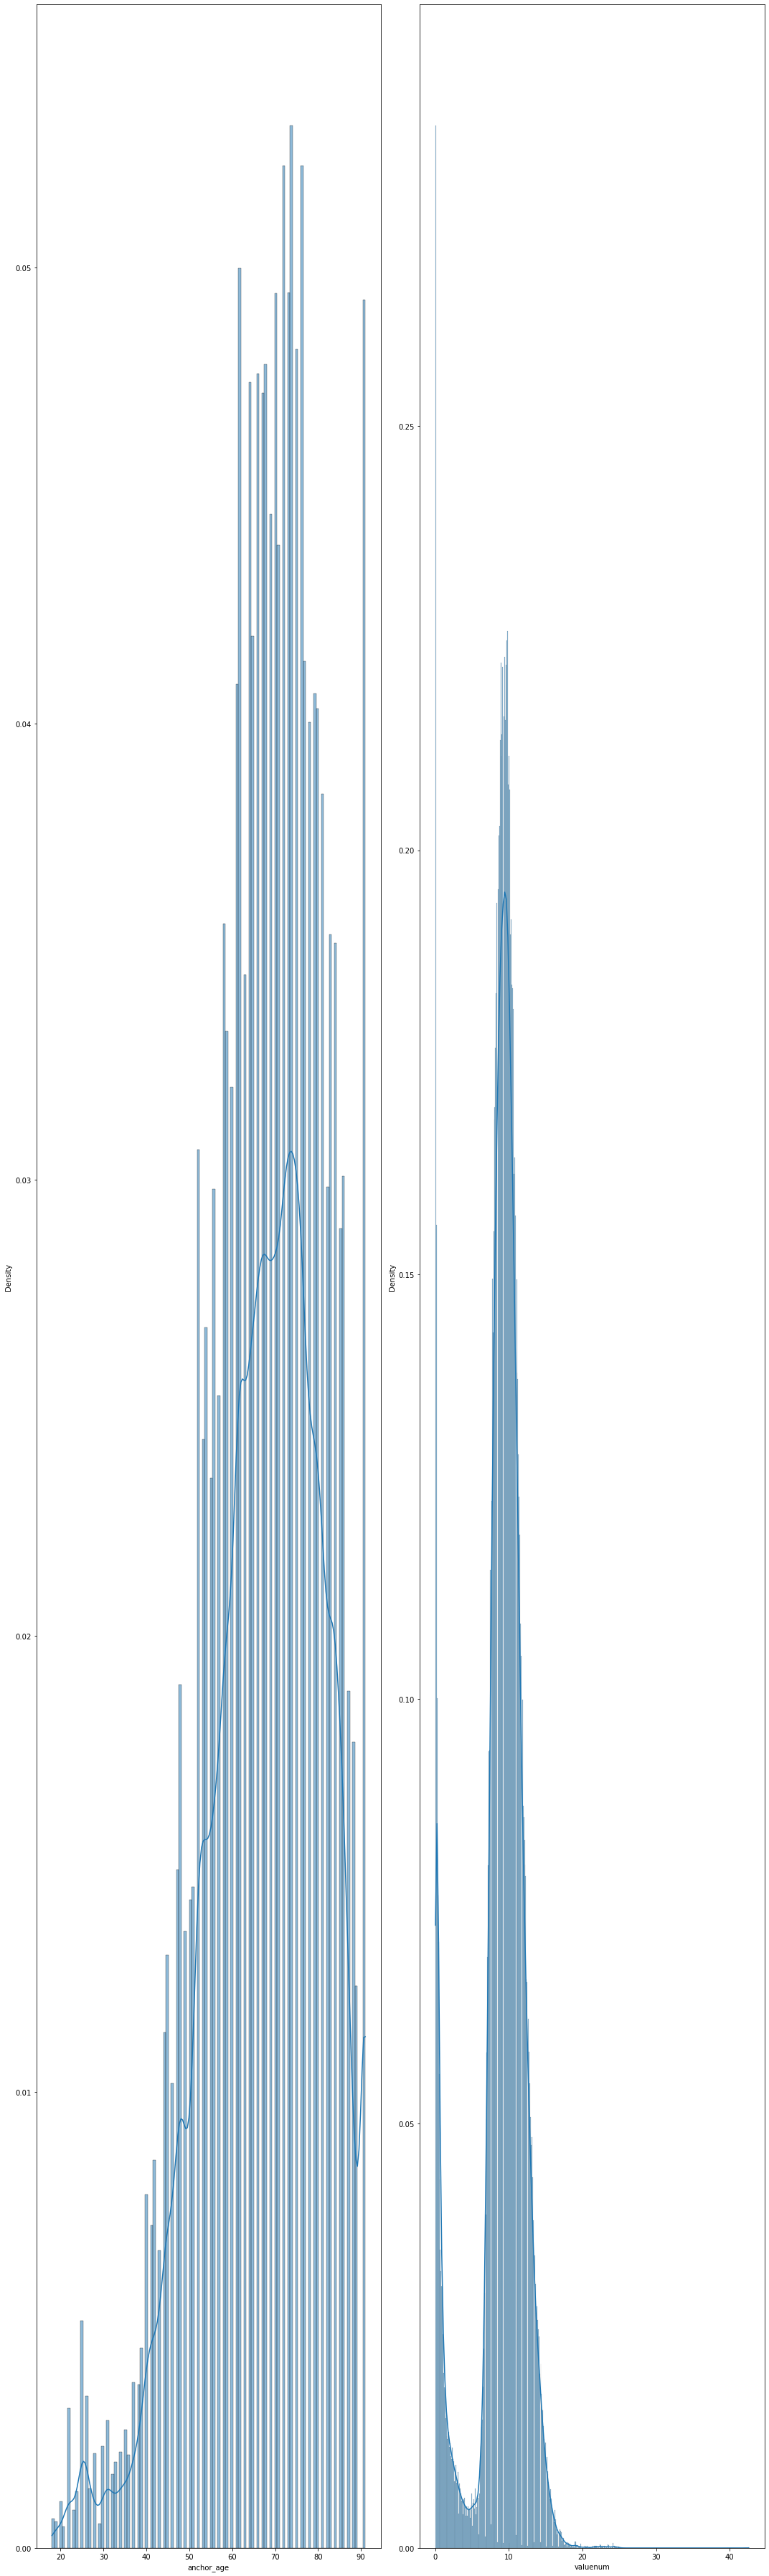

In [31]:
# plot overview distributions of numerical variables
# determining number of columns
ncols = 2
cols = num_df.columns

# determining number of rows
nrows = round(int(np.ceil(len(num_df.columns)) / (1.0*ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(15,50))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=num_df[col], kde=True, stat='density', ax=ax)

plt.tight_layout();

**anchor_age**

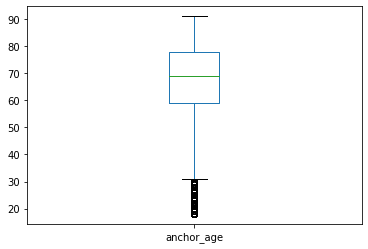

In [32]:
df.boxplot(column =['anchor_age'], grid = False);

In [33]:
df['anchor_age'].describe()

count    245338.000000
mean         67.736156
std          13.455024
min          18.000000
25%          59.000000
50%          69.000000
75%          78.000000
max          91.000000
Name: anchor_age, dtype: float64

**valuenum**

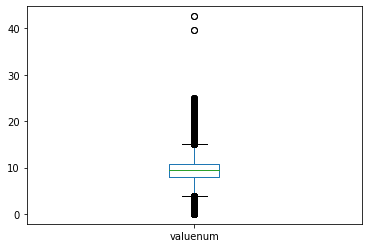

In [34]:
df.boxplot(column =['valuenum'], grid = False);

In [35]:
df['valuenum'].describe()

count    245338.000000
mean          8.850404
std           3.434129
min           0.010000
25%           8.000000
50%           9.400000
75%          10.800000
max          42.600000
Name: valuenum, dtype: float64

### categorical data

In [36]:
# select only categorical columns
nom_df = df.select_dtypes(include='object').copy()

In [37]:
nom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245338 entries, 0 to 245337
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   deathtime    35338 non-null   object
 1   gender       245338 non-null  object
 2   dod          91195 non-null   object
 3   valueuom     245338 non-null  object
 4   charttime    245338 non-null  object
 5   storetime    245338 non-null  object
 6   icu_intime   245338 non-null  object
 7   icu_outtime  245338 non-null  object
 8   starttime    245338 non-null  object
 9   stoptime     245296 non-null  object
dtypes: object(10)
memory usage: 20.6+ MB


In [38]:
nom_df['gender'].value_counts(normalize=True)

M    0.626866
F    0.373134
Name: gender, dtype: float64

### earliest time when itemid (drug)==1
<br> itemid (aspirin/p2y12/other_antiplatelet)==1

##### aspirin

In [39]:
# number of subjects
df['subject_id'].nunique()

16407

In [40]:
df[(df['subject_id']==10000980) & df['aspirin']==1][['starttime_dt']].iloc[0]

starttime_dt   2189-06-27 11:00:00
Name: 1197, dtype: datetime64[ns]

In [41]:
aspirin_starttime_df = df[df['aspirin']==1].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','aspirin','starttime_dt']]
aspirin_starttime_df.rename(columns={'starttime_dt': 'aspirin_starttime'},inplace=True) 
aspirin_starttime_df.head(10)

,subject_id,aspirin,aspirin_starttime
0,10000980,1,2189-06-27 11:00:00
1,10002013,1,2160-05-19 10:00:00
2,10002430,1,2129-06-13 04:00:00
3,10002495,1,2141-05-23 08:00:00
4,10002527,1,2136-03-25 10:00:00
5,10002760,1,2141-04-21 10:00:00
6,10003502,1,2169-08-27 04:00:00
7,10004422,1,2111-01-18 10:00:00
8,10004457,1,2141-12-18 10:00:00
9,10004733,1,2174-05-12 08:00:00


In [42]:
aspirin_starttime_df.shape

(15818, 3)

##### p2y12

In [43]:
df[(df['subject_id']==10000980) & df['p2y12']==1][['starttime_dt']].iloc[0]

starttime_dt   2189-06-27 11:00:00
Name: 1196, dtype: datetime64[ns]

In [44]:
p2y12_starttime_df = df[df['p2y12']==1].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','p2y12','starttime_dt']]
p2y12_starttime_df.rename(columns={'starttime_dt': 'p2y12_starttime'},inplace=True) 
p2y12_starttime_df.head(10)

,subject_id,p2y12,p2y12_starttime
0,10000980,1,2189-06-27 11:00:00
1,10002013,1,2160-05-19 10:00:00
2,10002495,1,2141-05-27 06:00:00
3,10008077,1,2191-06-03 08:00:00
4,10013310,1,2153-07-05 08:00:00
5,10013643,1,2200-02-10 08:00:00
6,10015931,1,2176-11-20 08:00:00
7,10019385,1,2180-02-22 08:00:00
8,10022281,1,2125-06-17 10:00:00
9,10023771,1,2113-08-27 10:00:00


##### other_antiplatelet

In [45]:
df[(df['subject_id']==10881690) & df['other_antiplatelet']==1][['starttime_dt']].iloc[0]

starttime_dt   2163-04-25 13:00:00
Name: 0, dtype: datetime64[ns]

In [46]:
other_antiplatelet_starttime_df = df[df['other_antiplatelet']==1].sort_values(by=['subject_id','starttime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','other_antiplatelet','starttime_dt']]
other_antiplatelet_starttime_df.rename(columns={'starttime_dt': 'antiplatelet_starttime'},inplace=True) 
other_antiplatelet_starttime_df.head(10)

,subject_id,other_antiplatelet,antiplatelet_starttime
0,10881690,1,2163-04-25 12:00:00
1,12588030,1,2129-10-12 20:00:00
2,12662064,1,2112-04-01 20:00:00
3,12859888,1,2121-01-03 06:00:00
4,13660560,1,2154-09-22 18:00:00
5,13993123,1,2146-07-25 20:00:00
6,14391747,1,2155-10-11 20:00:00
7,14837844,1,2119-10-21 21:00:00
8,15904250,1,2123-10-10 08:00:00
9,16644308,1,2189-03-29 16:00:00


### time of medication from hosp_admittime

In [47]:
df[['subject_id','addmittime_dt']]['subject_id'].nunique()

16407

In [48]:
dfs = [aspirin_starttime_df, p2y12_starttime_df, other_antiplatelet_starttime_df]

In [49]:
starttimes_df = ft.reduce(lambda left, right: pd.merge(left, right, on='subject_id', how='outer'), dfs)
starttimes_df

,subject_id,aspirin,aspirin_starttime,p2y12,p2y12_starttime,other_antiplatelet,antiplatelet_starttime
0,10000980,1.0,2189-06-27 11:00:00,1.0,2189-06-27 11:00:00,NaN,NaT
1,10002013,1.0,2160-05-19 10:00:00,1.0,2160-05-19 10:00:00,NaN,NaT
2,10002430,1.0,2129-06-13 04:00:00,NaN,NaT,NaN,NaT
3,10002495,1.0,2141-05-23 08:00:00,1.0,2141-05-27 06:00:00,NaN,NaT
4,10002527,1.0,2136-03-25 10:00:00,NaN,NaT,NaN,NaT
...,...,...,...,...,...,...,...
16402,19985683,NaN,NaT,1.0,2131-07-10 10:00:00,NaN,NaT
16403,12662064,NaN,NaT,NaN,NaT,1.0,2112-04-01 20:00:00
16404,13660560,NaN,NaT,NaN,NaT,1.0,2154-09-22 18:00:00
16405,14391747,NaN,NaT,NaN,NaT,1.0,2155-10-11 20:00:00


In [50]:
starttimes_df = starttimes_df.merge(addmittime_df,on='subject_id',how='inner').drop(columns=['aspirin','p2y12','other_antiplatelet'])


In [51]:
starttimes_df

,subject_id,aspirin_starttime,p2y12_starttime,antiplatelet_starttime,addmittime_dt
0,10000980,2189-06-27 11:00:00,2189-06-27 11:00:00,NaT,2189-06-27 07:38:00
1,10002013,2160-05-19 10:00:00,2160-05-19 10:00:00,NaT,2160-05-18 07:45:00
2,10002430,2129-06-13 04:00:00,NaT,NaT,2129-06-13 00:00:00
3,10002495,2141-05-23 08:00:00,2141-05-27 06:00:00,NaT,2141-05-22 20:17:00
4,10002527,2136-03-25 10:00:00,NaT,NaT,2136-03-24 12:30:00
...,...,...,...,...,...
16402,19985683,NaT,2131-07-10 10:00:00,NaT,2131-10-06 20:55:00
16403,12662064,NaT,NaT,2112-04-01 20:00:00,2112-01-04 16:18:00
16404,13660560,NaT,NaT,2154-09-22 18:00:00,2154-09-22 15:04:00
16405,14391747,NaT,NaT,2155-10-11 20:00:00,2155-11-10 19:48:00


In [52]:
starttimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16407 entries, 0 to 16406
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   subject_id              16407 non-null  int64         
 1   aspirin_starttime       15818 non-null  datetime64[ns]
 2   p2y12_starttime         3293 non-null   datetime64[ns]
 3   antiplatelet_starttime  22 non-null     datetime64[ns]
 4   addmittime_dt           16407 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(1)
memory usage: 769.1 KB


In [53]:
# time difference in hours
starttimes_df['aspirin_timediff'] = (starttimes_df['aspirin_starttime'] - starttimes_df['addmittime_dt']).dt.seconds.div(3600)
starttimes_df['p2y12_timediff'] = (starttimes_df['p2y12_starttime'] - starttimes_df['addmittime_dt']).dt.seconds.div(3600)
starttimes_df['antiplatelet_timediff'] = (starttimes_df['antiplatelet_starttime'] - starttimes_df['addmittime_dt']).dt.seconds.div(3600)

In [54]:
starttimes_df.head(10)

,subject_id,aspirin_starttime,p2y12_starttime,antiplatelet_starttime,addmittime_dt,aspirin_timediff,p2y12_timediff,antiplatelet_timediff
0,10000980,2189-06-27 11:00:00,2189-06-27 11:00:00,NaT,2189-06-27 07:38:00,3.366667,3.366667,NaN
1,10002013,2160-05-19 10:00:00,2160-05-19 10:00:00,NaT,2160-05-18 07:45:00,2.250000,2.250000,NaN
2,10002430,2129-06-13 04:00:00,NaT,NaT,2129-06-13 00:00:00,4.000000,NaN,NaN
3,10002495,2141-05-23 08:00:00,2141-05-27 06:00:00,NaT,2141-05-22 20:17:00,11.716667,9.716667,NaN
4,10002527,2136-03-25 10:00:00,NaT,NaT,2136-03-24 12:30:00,21.500000,NaN,NaN
5,10002760,2141-04-21 10:00:00,NaT,NaT,2141-04-20 07:15:00,2.750000,NaN,NaN
6,10003502,2169-08-27 04:00:00,NaT,NaT,2169-08-26 16:14:00,11.766667,NaN,NaN
7,10004422,2111-01-18 10:00:00,NaT,NaT,2111-01-15 14:55:00,19.083333,NaN,NaN
8,10004457,2141-12-18 10:00:00,NaT,NaT,2141-12-17 11:00:00,23.000000,NaN,NaN
9,10004733,2174-05-12 08:00:00,NaT,NaT,2174-12-04 11:28:00,20.533333,NaN,NaN


In [55]:
# aspirin_starttime_df
# p2y12_starttime_df
# other_antiplatelet_starttime_df

In [57]:
df[['subject_id','addmittime_dt']]

,subject_id,addmittime_dt
0,10881690,2163-04-25 10:41:00
1,10881690,2163-04-25 10:41:00
2,10881690,2163-04-25 10:41:00
3,10881690,2163-04-25 10:41:00
4,10881690,2163-04-25 10:41:00
...,...,...
245333,19997752,2128-02-28 21:28:00
245334,19997752,2128-02-28 21:28:00
245335,19997752,2128-02-28 21:28:00
245336,19997752,2128-02-28 21:28:00


### earliest time itemid (troponin) consecutive > 20%

In [58]:
df['itemid'].unique()

array([51222, 51003], dtype=int64)

In [59]:
df[(df['subject_id']==12588030) & (df['itemid']==51003)][['subject_id','valuenum','storetime_dt']].sort_values(by=['subject_id','storetime_dt']).drop_duplicates(subset=['subject_id','storetime_dt'],keep='first')

,subject_id,valuenum,storetime_dt
90,12588030,4.42,2129-10-12 14:11:00
92,12588030,6.39,2129-10-12 21:19:00
93,12588030,7.51,2129-11-12 05:06:00
97,12588030,8.78,2129-12-13 07:04:00


In [60]:
trop_inc_df = df[(df['itemid']==51003)][['subject_id','valuenum','storetime_dt']].sort_values(by=['subject_id','storetime_dt']).drop_duplicates(subset=['subject_id','storetime_dt'],keep='first')
trop_inc_df.head(10)

,subject_id,valuenum,storetime_dt
1196,10000980,0.11,2189-06-27 14:18:00
1210,10002495,0.69,2141-05-22 23:05:00
1212,10002495,0.84,2141-05-23 02:35:00
1213,10002495,1.75,2141-05-23 08:02:00
1215,10002495,3.11,2141-05-23 12:34:00
1217,10002495,3.75,2141-05-23 18:25:00
1220,10002495,6.74,2141-05-24 08:23:00
80931,10003502,0.13,2169-08-27 07:38:00
80999,10007058,0.70,2167-08-11 01:18:00
81001,10007058,1.37,2167-08-11 07:29:00


In [61]:
# time_diff convert to hrs
trop_inc_df['storetime_diff'] = trop_inc_df['storetime_dt'].diff().dt.seconds.div(3600)

# troponin diff in pct_change
trop_inc_df['trop_pct'] = trop_inc_df['valuenum'].pct_change()

In [62]:
trop_inc_df.head()

,subject_id,valuenum,storetime_dt,storetime_diff,trop_pct
1196,10000980,0.11,2189-06-27 14:18:00,NaN,NaN
1210,10002495,0.69,2141-05-22 23:05:00,8.783333,5.272727
1212,10002495,0.84,2141-05-23 02:35:00,3.500000,0.217391
1213,10002495,1.75,2141-05-23 08:02:00,5.450000,1.083333
1215,10002495,3.11,2141-05-23 12:34:00,4.533333,0.777143


In [63]:
trop_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15245 entries, 1196 to 245318
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   subject_id      15245 non-null  int64         
 1   valuenum        15245 non-null  float64       
 2   storetime_dt    15245 non-null  datetime64[ns]
 3   storetime_diff  15244 non-null  float64       
 4   trop_pct        15244 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 714.6 KB


In [64]:
trop_inc_df[trop_inc_df['storetime_diff'] <= (12)]

,subject_id,valuenum,storetime_dt,storetime_diff,trop_pct
1210,10002495,0.69,2141-05-22 23:05:00,8.783333,5.272727
1212,10002495,0.84,2141-05-23 02:35:00,3.500000,0.217391
1213,10002495,1.75,2141-05-23 08:02:00,5.450000,1.083333
1215,10002495,3.11,2141-05-23 12:34:00,4.533333,0.777143
1217,10002495,3.75,2141-05-23 18:25:00,5.850000,0.205788
...,...,...,...,...,...
245155,19997293,0.08,2123-10-14 18:09:00,6.600000,-0.836735
245157,19997293,0.07,2123-10-15 03:08:00,8.983333,-0.125000
80881,19997473,3.08,2173-09-14 07:09:00,7.050000,-0.012821
245324,19997752,0.38,2128-03-03 10:09:00,3.000000,-0.876623


In [65]:
# drop first row of each subject
trop_inc_df.groupby('subject_id').apply(lambda group: group.iloc[1:, 1:]).reset_index()

,subject_id,level_1,valuenum,storetime_dt,storetime_diff,trop_pct
0,10002495,1212,0.84,2141-05-23 02:35:00,3.500000,0.217391
1,10002495,1213,1.75,2141-05-23 08:02:00,5.450000,1.083333
2,10002495,1215,3.11,2141-05-23 12:34:00,4.533333,0.777143
3,10002495,1217,3.75,2141-05-23 18:25:00,5.850000,0.205788
4,10002495,1220,6.74,2141-05-24 08:23:00,13.966667,0.797333
...,...,...,...,...,...,...
10093,19993336,244963,1.00,2171-07-09 12:17:00,6.466667,-0.107143
10094,19997293,245157,0.07,2123-10-15 03:08:00,8.983333,-0.125000
10095,19997473,80881,3.08,2173-09-14 07:09:00,7.050000,-0.012821
10096,19997752,245320,0.28,2128-04-03 14:03:00,3.900000,-0.263158


In [66]:
trop_inc_starttime = trop_inc_df.groupby('subject_id').first().reset_index()
trop_inc_starttime.rename(columns={'storetime_dt': 'trop_risetime'},inplace=True) 
trop_inc_starttime

,subject_id,valuenum,trop_risetime,storetime_diff,trop_pct
0,10000980,0.11,2189-06-27 14:18:00,NaN,NaN
1,10002495,0.69,2141-05-22 23:05:00,8.783333,5.272727
2,10003502,0.13,2169-08-27 07:38:00,23.250000,-0.980712
3,10007058,0.70,2167-08-11 01:18:00,17.666667,4.384615
4,10008077,0.21,2191-05-03 23:03:00,16.150000,-0.924188
...,...,...,...,...,...
5142,19994505,0.01,2185-03-11 18:30:00,11.833333,-0.500000
5143,19995780,0.49,2125-10-20 11:33:00,17.050000,48.000000
5144,19997293,0.08,2123-10-14 18:09:00,6.600000,-0.836735
5145,19997473,3.12,2173-09-14 00:06:00,20.966667,43.571429


### time closest BEFORE trop_time , itemid (hemoglobin)==1
itemid = 51002 OR itemid = 51003 OR itemid = 52642 (troponin)
<br> itemid = 51222 (hemoglobin)

In [67]:
# hemo_charttime_df = df[df['itemid']==51222].sort_values(by=['subject_id','storetime_dt']).groupby(by='subject_id').first().reset_index()[['subject_id','itemid','storetime_dt']]
# hemo_charttime_df.rename(columns={'storetime_dt': 'hemo_storetime'},inplace=True) 
# hemo_charttime_df.head(10)

In [68]:
# df[(df['itemid']==51222) & (df['valuenum']>=7)]

In [69]:
tmp_hemo = df[(df['itemid']==51222) & (df['valuenum']>=7)].sort_values(by=['subject_id','storetime_dt'])[['subject_id','itemid','valuenum','storetime_dt']].rename(columns={'storetime_dt': 'hemo_storetime'})
tmp_hemo.head(10)

,subject_id,itemid,valuenum,hemo_storetime
1198,10002013,51222,10.2,2160-05-18 13:16:00
1201,10002013,51222,10.2,2160-05-18 13:16:00
1204,10002013,51222,10.2,2160-05-18 13:16:00
1207,10002013,51222,10.2,2160-05-18 13:16:00
1199,10002013,51222,11.2,2160-05-18 15:07:00
1202,10002013,51222,11.2,2160-05-18 15:07:00
1205,10002013,51222,11.2,2160-05-18 15:07:00
1208,10002013,51222,11.2,2160-05-18 15:07:00
1200,10002013,51222,10.9,2160-05-19 04:17:00
1203,10002013,51222,10.9,2160-05-19 04:17:00


In [70]:
tmp_hemo.shape

(208268, 4)

In [71]:
tmp_hemo = tmp_hemo.merge(trop_inc_starttime,on='subject_id',how='inner')
tmp_hemo 

,subject_id,itemid,valuenum_x,hemo_storetime,valuenum_y,trop_risetime,storetime_diff,trop_pct
0,10002495,51222,14.0,2141-05-22 22:22:00,0.69,2141-05-22 23:05:00,8.783333,5.272727
1,10002495,51222,14.0,2141-05-22 22:22:00,0.69,2141-05-22 23:05:00,8.783333,5.272727
2,10002495,51222,14.3,2141-05-23 08:06:00,0.69,2141-05-22 23:05:00,8.783333,5.272727
3,10002495,51222,14.3,2141-05-23 08:06:00,0.69,2141-05-22 23:05:00,8.783333,5.272727
4,10002495,51222,13.0,2141-05-23 15:28:00,0.69,2141-05-22 23:05:00,8.783333,5.272727
...,...,...,...,...,...,...,...,...
89036,19997752,51222,9.1,2128-04-03 03:24:00,0.38,2128-03-03 10:09:00,3.000000,-0.876623
89037,19997752,51222,8.4,2128-06-03 04:01:00,0.38,2128-03-03 10:09:00,3.000000,-0.876623
89038,19997752,51222,8.4,2128-06-03 04:01:00,0.38,2128-03-03 10:09:00,3.000000,-0.876623
89039,19997752,51222,8.8,2128-07-03 03:29:00,0.38,2128-03-03 10:09:00,3.000000,-0.876623


In [72]:
tmp_hemo.shape 

(89041, 8)

In [73]:
# convert to hours
tmp_hemo['hemo_difftime'] = (tmp_hemo['trop_risetime'] - tmp_hemo['hemo_storetime']).dt.seconds.div(3600)

In [74]:
tmp_hemo = tmp_hemo.groupby('subject_id')[['hemo_difftime','valuenum_x']].min().reset_index()
tmp_hemo.rename(columns={'valuenum_x': 'hemo_valuenum'},inplace=True) 
tmp_hemo.head(10) 

,subject_id,hemo_difftime,hemo_valuenum
0,10002495,0.716667,11.1
1,10003502,0.566667,11.3
2,10007058,0.350000,12.0
3,10008077,1.000000,10.3
4,10009686,23.866667,11.6
5,10010058,0.750000,10.0
6,10010471,0.350000,7.2
7,10013310,0.566667,8.4
8,10013643,0.650000,8.4
9,10022584,18.683333,9.0


In [75]:
tmp_hemo.shape

(5105, 3)

### mortality_deathtime from trop_risetime (within 30days)

In [76]:
tmp_death = df[['subject_id','deathtime_dt']].groupby('subject_id').max().reset_index()
tmp_death

,subject_id,deathtime_dt
0,10000980,NaT
1,10002013,NaT
2,10002430,NaT
3,10002495,NaT
4,10002527,NaT
...,...,...
16402,19997293,NaT
16403,19997367,NaT
16404,19997448,NaT
16405,19997473,NaT


In [77]:
df[df['subject_id']==19913577][['subject_id','deathtime_dt']]

,subject_id,deathtime_dt
79867,19913577,2114-06-14 20:25:00
79868,19913577,2114-06-14 20:25:00
79869,19913577,2114-06-14 20:25:00
79870,19913577,2114-06-14 20:25:00
79871,19913577,2114-06-14 20:25:00
...,...,...
80492,19913577,2114-06-14 20:25:00
80493,19913577,2114-06-14 20:25:00
80494,19913577,2114-06-14 20:25:00
80495,19913577,2114-06-14 20:25:00


In [78]:
trop_inc_starttime[['subject_id','trop_risetime']]

,subject_id,trop_risetime
0,10000980,2189-06-27 14:18:00
1,10002495,2141-05-22 23:05:00
2,10003502,2169-08-27 07:38:00
3,10007058,2167-08-11 01:18:00
4,10008077,2191-05-03 23:03:00
...,...,...
5142,19994505,2185-03-11 18:30:00
5143,19995780,2125-10-20 11:33:00
5144,19997293,2123-10-14 18:09:00
5145,19997473,2173-09-14 00:06:00


In [79]:
tmp_death = tmp_death.merge(trop_inc_starttime, on='subject_id', how='inner')
tmp_death 

,subject_id,deathtime_dt,valuenum,trop_risetime,storetime_diff,trop_pct
0,10000980,NaT,0.11,2189-06-27 14:18:00,NaN,NaN
1,10002495,NaT,0.69,2141-05-22 23:05:00,8.783333,5.272727
2,10003502,NaT,0.13,2169-08-27 07:38:00,23.250000,-0.980712
3,10007058,NaT,0.70,2167-08-11 01:18:00,17.666667,4.384615
4,10008077,NaT,0.21,2191-05-03 23:03:00,16.150000,-0.924188
...,...,...,...,...,...,...
5142,19994505,NaT,0.01,2185-03-11 18:30:00,11.833333,-0.500000
5143,19995780,NaT,0.49,2125-10-20 11:33:00,17.050000,48.000000
5144,19997293,NaT,0.08,2123-10-14 18:09:00,6.600000,-0.836735
5145,19997473,NaT,3.12,2173-09-14 00:06:00,20.966667,43.571429


In [80]:
tmp_death['death_diff'] = (tmp_death['deathtime_dt'] - tmp_death['trop_risetime']).dt.seconds.div(3600)
tmp_death

,subject_id,deathtime_dt,valuenum,trop_risetime,storetime_diff,trop_pct,death_diff
0,10000980,NaT,0.11,2189-06-27 14:18:00,NaN,NaN,NaN
1,10002495,NaT,0.69,2141-05-22 23:05:00,8.783333,5.272727,NaN
2,10003502,NaT,0.13,2169-08-27 07:38:00,23.250000,-0.980712,NaN
3,10007058,NaT,0.70,2167-08-11 01:18:00,17.666667,4.384615,NaN
4,10008077,NaT,0.21,2191-05-03 23:03:00,16.150000,-0.924188,NaN
...,...,...,...,...,...,...,...
5142,19994505,NaT,0.01,2185-03-11 18:30:00,11.833333,-0.500000,NaN
5143,19995780,NaT,0.49,2125-10-20 11:33:00,17.050000,48.000000,NaN
5144,19997293,NaT,0.08,2123-10-14 18:09:00,6.600000,-0.836735,NaN
5145,19997473,NaT,3.12,2173-09-14 00:06:00,20.966667,43.571429,NaN


In [81]:
tmp_death['death_diff'].nunique()

645

In [82]:
tmp_death_final = tmp_death[tmp_death['death_diff']<30]
tmp_death_final

,subject_id,deathtime_dt,valuenum,trop_risetime,storetime_diff,trop_pct,death_diff
6,10010058,2147-11-19 04:00:00,1.41,2147-11-18 06:57:00,14.633333,-0.007042,21.050000
7,10010471,2155-07-12 15:30:00,5.30,2155-03-12 01:07:00,7.416667,0.387435,14.383333
12,10024982,2203-11-10 19:10:00,0.52,2203-06-10 02:09:00,20.316667,-0.865979,17.016667
17,10046679,2172-01-24 20:50:00,0.39,2172-01-23 10:06:00,4.350000,1.166667,10.733333
23,10055344,2171-02-11 17:05:00,16.78,2171-01-11 05:51:00,0.700000,2.410569,11.233333
...,...,...,...,...,...,...,...
5081,19883399,2133-08-20 21:30:00,0.45,2133-03-08 14:26:00,6.700000,10.250000,7.066667
5089,19897344,2131-05-21 18:30:00,1.11,2131-05-14 20:03:00,4.300000,-0.584270,22.450000
5095,19913577,2114-06-14 20:25:00,0.90,2114-06-14 19:40:00,15.366667,-0.859594,0.750000
5100,19926342,2166-04-29 20:40:00,0.81,2166-05-04 04:04:00,23.600000,-0.950000,16.600000


In [83]:
# tmp_death['death_bin'] = tmp_death['death_diff'].apply(lambda x: 0 if  x is np.nan else 1)

In [84]:
# tmp_death['death_bin'].value_counts('normalise=True')

### final df

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245338 entries, 0 to 245337
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   subject_id            245338 non-null  int64         
 1   hospital_expire_flag  245338 non-null  int64         
 2   deathtime             35338 non-null   object        
 3   gender                245338 non-null  object        
 4   anchor_age            245338 non-null  int64         
 5   dod                   91195 non-null   object        
 6   valuenum              245338 non-null  float64       
 7   valueuom              245338 non-null  object        
 8   itemid                245338 non-null  int64         
 9   charttime             245338 non-null  object        
 10  storetime             245338 non-null  object        
 11  icu_intime            245338 non-null  object        
 12  icu_outtime           245338 non-null  object        
 13 

In [86]:
df.shape

(245338, 28)

In [87]:
df.groupby('subject_id').first().reset_index()[['subject_id','gender','anchor_age','mortality_deathtime','icu_intime_dt']]

,subject_id,gender,anchor_age,mortality_deathtime,icu_intime_dt
0,10000980,F,73,0,2189-06-27 08:42:00
1,10002013,F,53,0,2160-05-18 10:00:00
2,10002430,M,86,0,2129-06-13 00:43:00
3,10002495,M,81,0,2141-05-22 20:18:00
4,10002527,M,50,0,2136-03-24 10:24:00
...,...,...,...,...,...
16402,19997293,M,76,0,2123-12-10 21:55:00
16403,19997367,F,63,0,2126-04-21 10:09:00
16404,19997448,F,52,0,2122-07-23 10:35:00
16405,19997473,F,82,0,2173-09-13 20:10:00


In [88]:
df1 = df.groupby('subject_id').first().reset_index()[['subject_id','gender','mortality_deathtime','anchor_age','icu_intime_dt']]

In [105]:
df2 = starttimes_df[['subject_id','aspirin_timediff','p2y12_timediff','antiplatelet_timediff']]

In [106]:
# df3 = hemo_charttime_df[['subject_id','hemo_storetime']]
df3 = tmp_hemo[['subject_id','hemo_difftime','hemo_valuenum']]

In [107]:
df4 = trop_inc_starttime[['subject_id','trop_risetime']]

In [108]:
# df5 = tmp_death_final[['subject_id','death_diff']]

In [109]:
dfs1 = [df1, df2, df3, df4]

In [110]:
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='subject_id',how='outer'), dfs1)


In [111]:
df_final.isnull().sum()

subject_id                   0
gender                       0
mortality_deathtime          0
anchor_age                   0
icu_intime_dt                0
aspirin_timediff           589
p2y12_timediff           13114
antiplatelet_timediff    16385
hemo_difftime            11302
hemo_valuenum            11302
trop_risetime            11260
dtype: int64

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16407 entries, 0 to 16406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   subject_id             16407 non-null  int64         
 1   gender                 16407 non-null  object        
 2   mortality_deathtime    16407 non-null  int64         
 3   anchor_age             16407 non-null  int64         
 4   icu_intime_dt          16407 non-null  datetime64[ns]
 5   aspirin_timediff       15818 non-null  float64       
 6   p2y12_timediff         3293 non-null   float64       
 7   antiplatelet_timediff  22 non-null     float64       
 8   hemo_difftime          5105 non-null   float64       
 9   hemo_valuenum          5105 non-null   float64       
 10  trop_risetime          5147 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 1.5+ MB


In [113]:
# df_final['death_bin'] = df_final['death_diff'].apply(lambda x:0 if x is np.nan else 1)

In [114]:
# df_final.drop(columns=['death_diff'],inplace=True)

In [115]:
df_final['mortality_deathtime'].value_counts(normalize=True)

0    0.929055
1    0.070945
Name: mortality_deathtime, dtype: float64

In [116]:
df_final.shape

(16407, 11)

In [117]:
df_final.head()

,subject_id,gender,mortality_deathtime,anchor_age,icu_intime_dt,aspirin_timediff,p2y12_timediff,antiplatelet_timediff,hemo_difftime,hemo_valuenum,trop_risetime
0,10000980,F,0,73,2189-06-27 08:42:00,3.366667,3.366667,NaN,NaN,NaN,2189-06-27 14:18:00
1,10002013,F,0,53,2160-05-18 10:00:00,2.250000,2.250000,NaN,NaN,NaN,NaT
2,10002430,M,0,86,2129-06-13 00:43:00,4.000000,NaN,NaN,NaN,NaN,NaT
3,10002495,M,0,81,2141-05-22 20:18:00,11.716667,9.716667,NaN,0.716667,11.1,2141-05-22 23:05:00
4,10002527,M,0,50,2136-03-24 10:24:00,21.500000,NaN,NaN,NaN,NaN,NaT


In [118]:
# df_med = df_final[['subject_id','aspirin_starttime','p2y12_starttime','p2y12_starttime','antiplatelet_starttime']]
# df_med.head()
# df_med.to_csv('./data/df_med.csv')

#### export final dataset

In [119]:
df_final.to_csv('./data/final_df.csv')